<a href="https://colab.research.google.com/github/nareekarn/All_project_in_class/blob/main/Why_Employees_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

นำเข้าข้อมูล จาก https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
emp = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
emp

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


#Data Understanding

Exploration

ตรวจสอบประเภทและค่า NULL ของข้อมูลแต่ละคอลัมน์

In [ ]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

พบว่าข้อมูลมี 1470 row มี 35 column ไม่มีข้อมูลในคอลัมน์ใดมีค่า null 

หาค่า unique valuesของแต่ละคอลัมน์

In [ ]:
empUnique = emp.nunique()
empUnique = empUnique.sort_values()
empUnique

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

มีคอลัมน์ที่มีค่า unique values = 1 อยู่ 3 คอลัมน์ และมีข้อมูลที่มีค่า unique values = 1470 อยู่ 1 คอลัมน์

In [ ]:
emp.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
head_i = []
for column in emp.columns:
    if emp[column].dtype == int and len(emp[column].unique()) <= 50:
        head_i.append(column)

In [ ]:
head_o = []
for column in emp.columns:
    if emp[column].dtype == object and len(emp[column].unique()) <= 50:
        head_o.append(column)

แสดงกราฟฮิสโตรแกรมของข้อมูลที่เป็นint เพื่อดูการกระจายตัวของข้อมูลในแต่ละปัจจัย

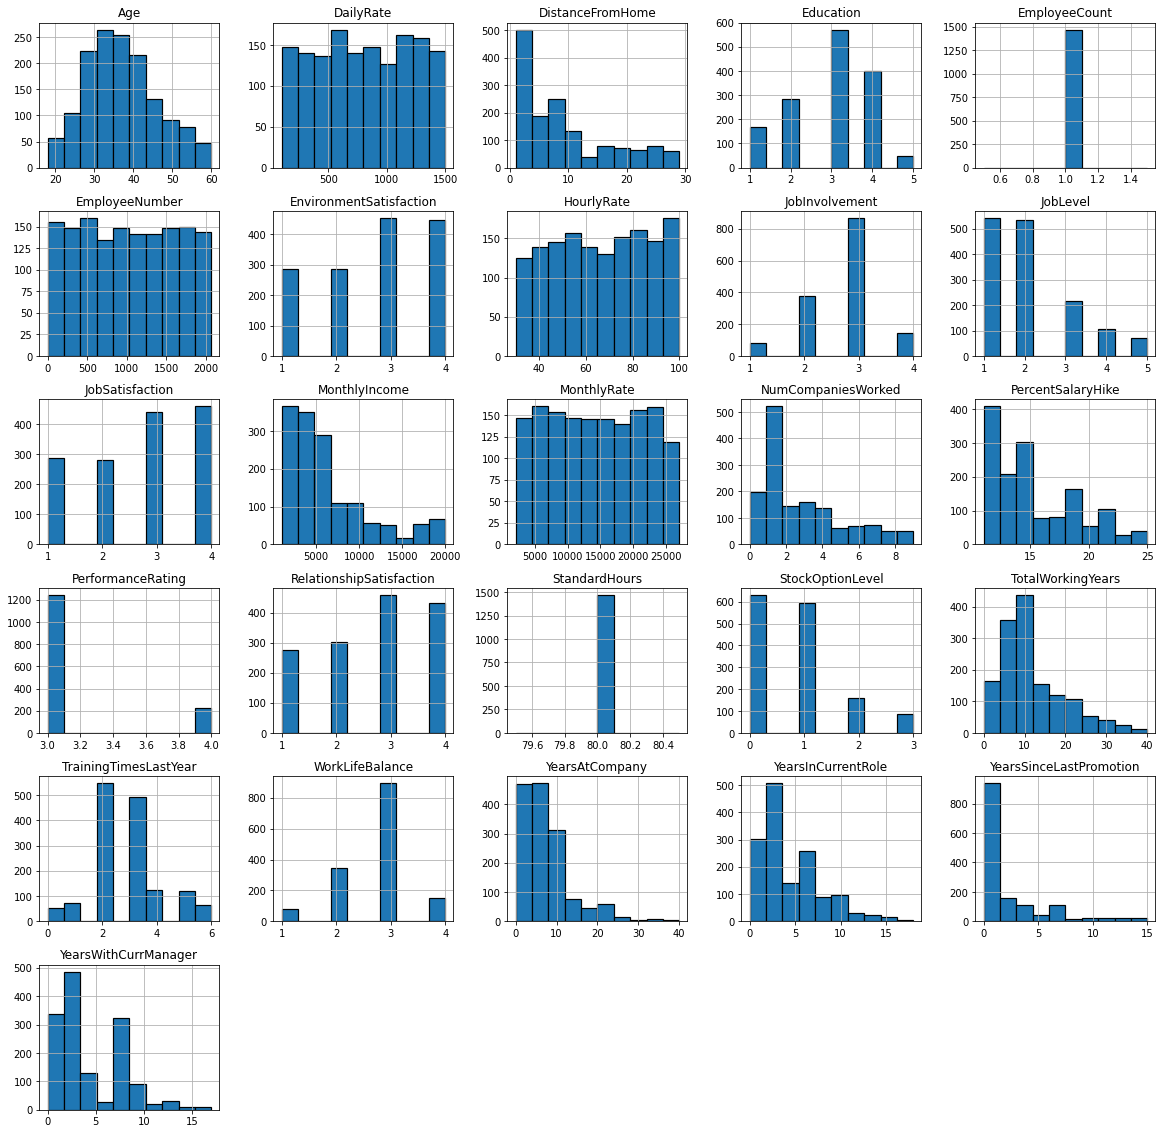

In [ ]:
emp.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

แสดงกราฟแท่งสำหรับข้อมูลที่เป็นกลุ่ม เพื่อดูข้อมูลว่ามีจำนวนเท่าใดในแต่ละกลุ่ใของปัจจัย

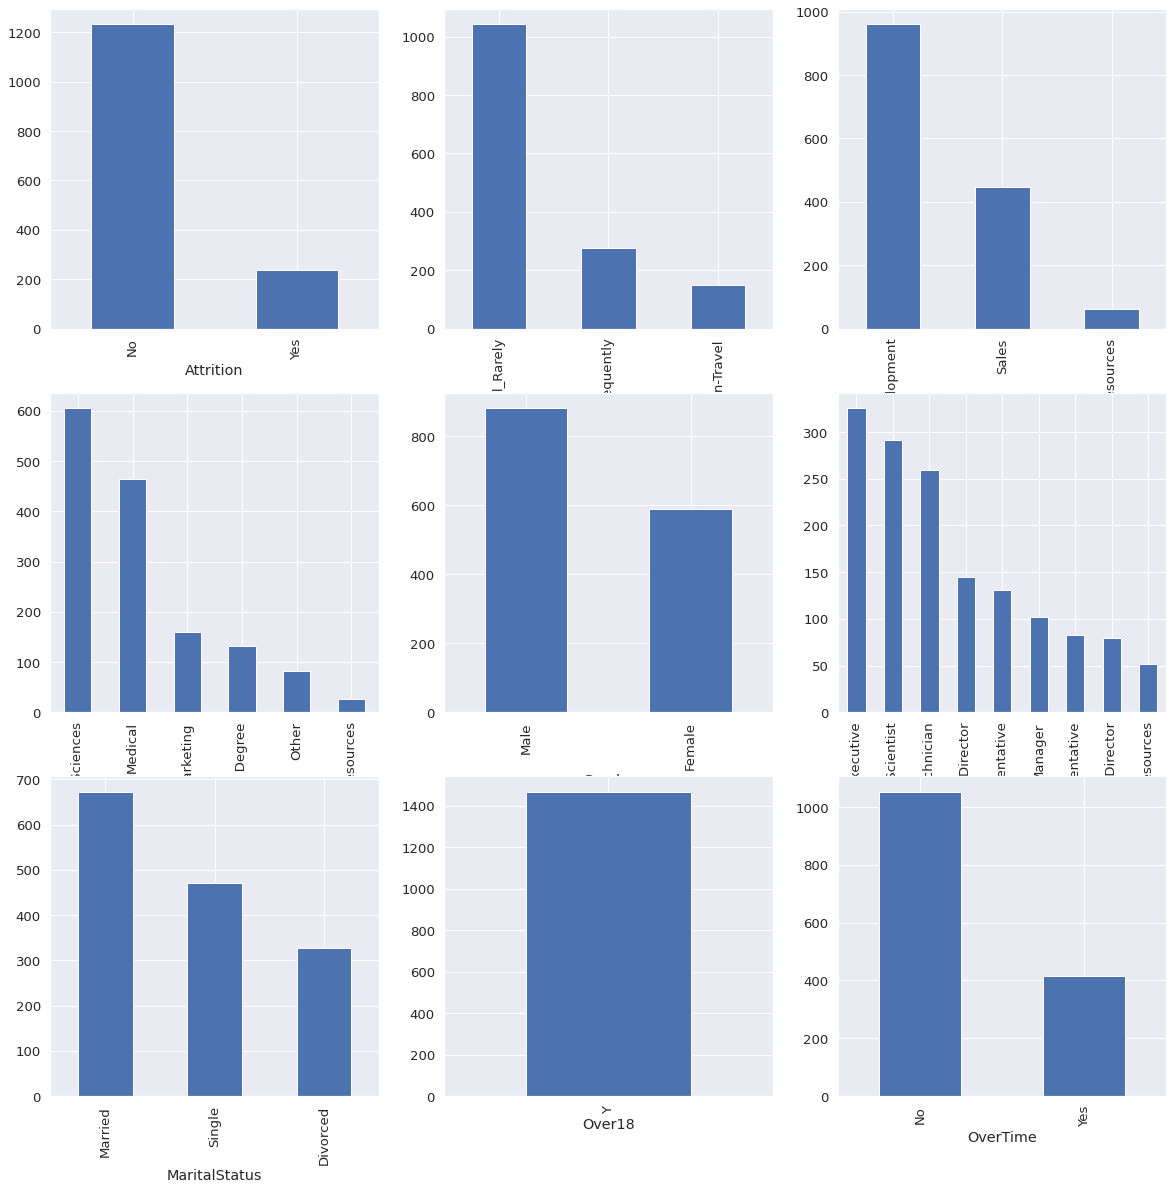

In [ ]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 20))
for i, column in enumerate(head_o, 1):
    plt.subplot(3, 3, i)
    g = emp[column].value_counts().plot.bar()
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.xlabel(f'{column}')

#Data Preparation

1. ลบคอลัมน์ที่มีค่าunique valuesเพียงค่าเดียวและคอลัมน์ที่มีค่า unique valuesเท่ากับจำนวนrowออก เพราะไม่ส่งผลต่อการทำนายตัวแปร จากการดูกราฟและการหาค่าunique values

In [ ]:
#drop column
emp.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

2. ลบคอลัมน์ที่มีค่า correlation ระหว่างกันมากออกโดยเลือกให้เหลือตัวใดตัวหนึ่ง เพราะถือว่าให้ผลลัพธ์คล้ายกัน ด้วยcorrelation matrix

In [ ]:
#change type for correlation
emp['Education']=emp['Education'].astype("category").cat.codes
emp['EducationField']=emp['EducationField'].astype("category").cat.codes
emp['EnvironmentSatisfaction'] = emp['EnvironmentSatisfaction'].astype("category").cat.codes
emp['JobInvolvement'] = emp['JobInvolvement'].astype("category").cat.codes
emp['JobSatisfaction'] = emp['JobSatisfaction'].astype("category").cat.codes
emp['PerformanceRating']=emp['PerformanceRating'].astype("category").cat.codes
emp['RelationshipSatisfaction'] = emp['RelationshipSatisfaction'].astype("category").cat.codes
emp['WorkLifeBalance'] = emp['WorkLifeBalance'].astype("category").cat.codes


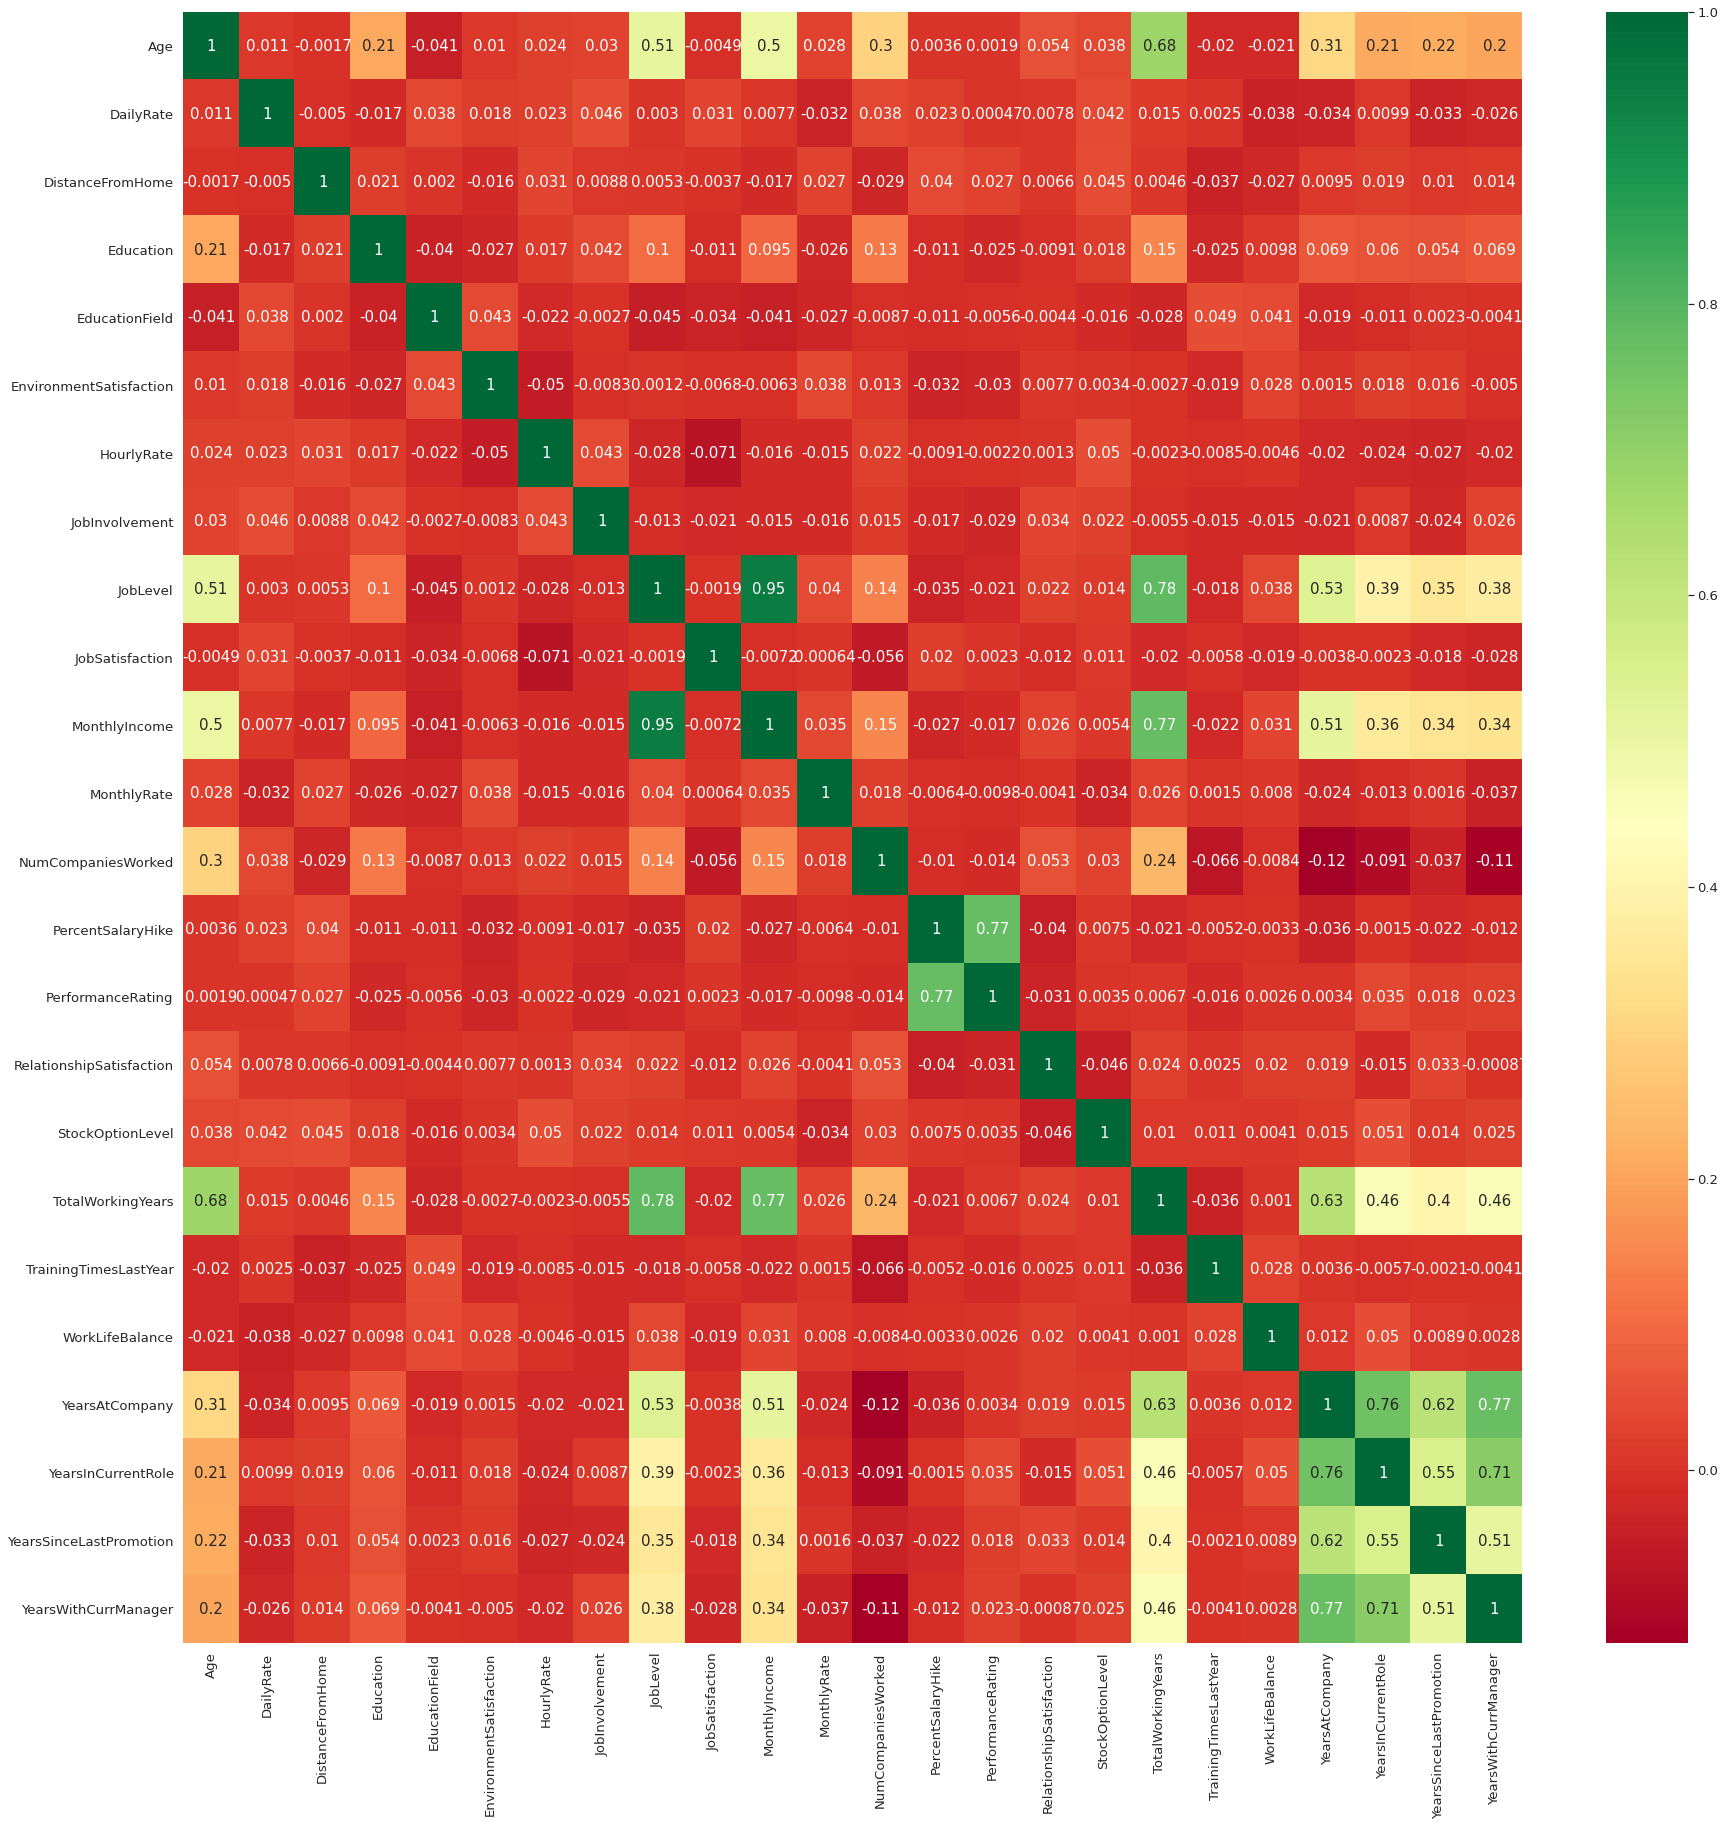

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(emp.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [ ]:
#drop column
emp.drop(['Education','JobLevel', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsInCurrentRole','YearsSinceLastPromotion'	,'YearsWithCurrManager'], axis="columns", inplace=True)

3. เลือกคอลัมน์ที่ใช้ตามความเหมาะสม โดยการดูกราฟเปรียบเทียบ

In [ ]:
#change type to select by your own
emp['EnvironmentSatisfaction'] = emp['EnvironmentSatisfaction'].astype(object)
emp['EducationField']=emp['EducationField'].astype(object)
emp['JobInvolvement'] = emp['JobInvolvement'].astype(object)
emp['JobSatisfaction'] = emp['JobSatisfaction'].astype(object)
emp['PerformanceRating'] = emp['PerformanceRating'].astype(object)
emp['RelationshipSatisfaction'] = emp['RelationshipSatisfaction'].astype(object)
emp['WorkLifeBalance'] = emp['WorkLifeBalance'].astype(object)

In [ ]:
head_o = []
for column in emp.columns:
    if emp[column].dtype == object:
        head_o.append(column)


แสดงกราฟแท่งเปรียบจำนวนคนลาออกกับกลุ่มย่อยในแต่ละปัจจัย

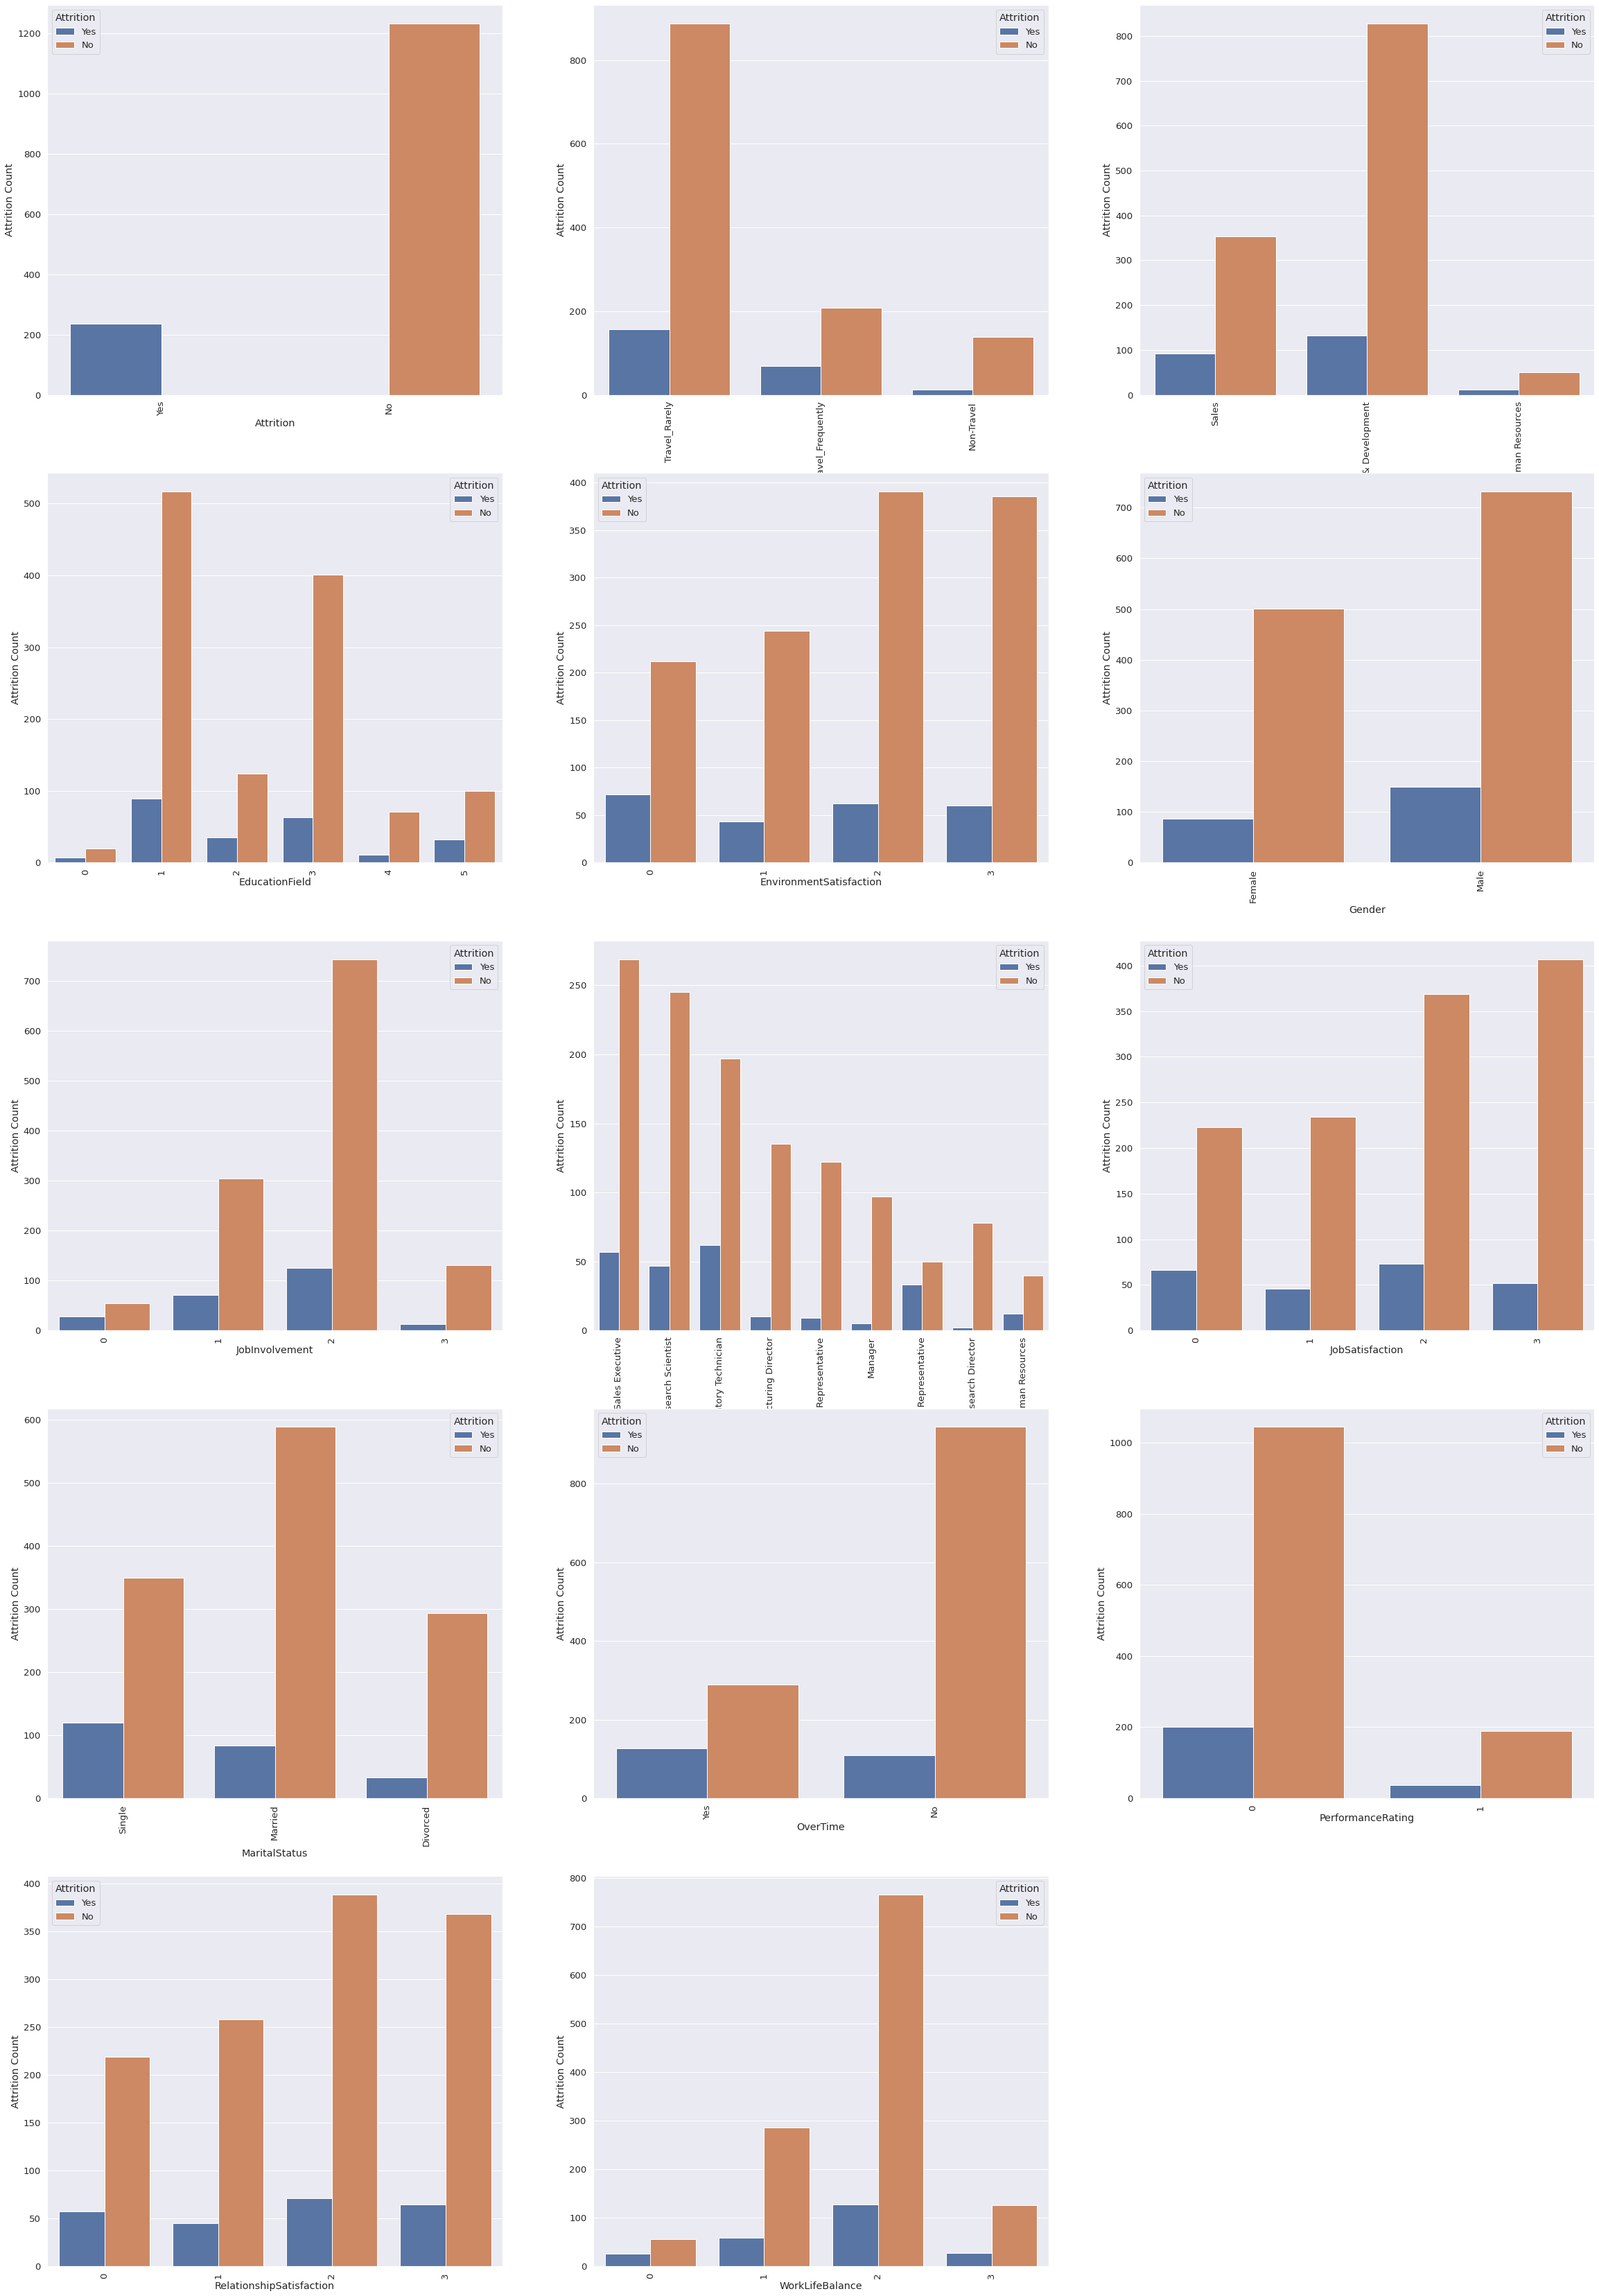

In [ ]:
sns.set(font_scale=1.2)
plt.figure(figsize=(40, 60))
for i, column in enumerate(head_o, 1):
    plt.subplot(5, 3, i)
    g = sns.countplot(x= column , hue='Attrition', data=emp)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')


 จากกราฟเทียบระหว่างคอลัมน์ Attrition กับคอลัมน์อื่นๆ ทางผู้จัดทำคิดว่าคอลัมน์ EnvironmentSatisfaction, RelationshipSatisfaction มีค่าการลาออกในแต่ละกลุ่มใกล้เคียงกันเลยคาดว่าไม่สามารถนำมาใช้ได้

In [ ]:
#drop column
emp.drop(['EnvironmentSatisfaction','RelationshipSatisfaction'], axis="columns", inplace=True)

แสดงกราฟเปรียบเทียบจำนวนคนลาออกและไม่ลาออกของแต่ละกลุ่มด้วยกราฟฮิสโตรแกรม

In [ ]:
head_i = []
for column in emp.columns:
    if emp[column].dtype == int :
        head_i.append(column)

In [ ]:
sns.set(font_scale=1.2)
for i, column in enumerate(head_i, 1):
    fig = px.histogram(emp, x= f"{column}", color="Attrition", marginal="rug",
                   hover_data=emp.columns)
    fig.show()

ตามความคิดเห็นของผู้จัดทำจากการดูกราฟจะตัดคอลัมน์ DistanceFromHome, HourlyRate, MonthlyRate, StockOptionLevel, TrainingTimesLastYear เพราะคิดว่าเป็นปัจจัยที่ไม่เกี่ยวข้องรวมถึงลักษณธการกระจายตัวของกราฟที่เป็นลาออกและไม่ลาออกคล้ายกัน เช่นTrainingTimesLastYear จะเห็นว่าลักษณะกราฟคล้ายกันในแต่ละช่วงแต่ต่างกันที่จำนวนเท่านั้น หรือStockOptionLevel ผู้ลาออกเป็นผู้ถือหุ้นช่วง-0.5-0.5 มีจำนวนมากที่สุด แต่ผู็ที่ไม่ลาออกก็อยู่ช่วงนี้เช่นเดียวกัน จึงไม่มีนัยสำคัญเกี่ยวกับการถือหุ้นของบริษัทหรือไม่

In [ ]:
emp.drop(['DistanceFromHome','HourlyRate','MonthlyRate','StockOptionLevel','TrainingTimesLastYear'], axis="columns", inplace=True)

จะเหลือข้อมูลดังนี้

In [ ]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                1470 non-null   int64 
 1   Attrition          1470 non-null   object
 2   BusinessTravel     1470 non-null   object
 3   DailyRate          1470 non-null   int64 
 4   Department         1470 non-null   object
 5   EducationField     1470 non-null   object
 6   Gender             1470 non-null   object
 7   JobInvolvement     1470 non-null   object
 8   JobRole            1470 non-null   object
 9   JobSatisfaction    1470 non-null   object
 10  MaritalStatus      1470 non-null   object
 11  MonthlyIncome      1470 non-null   int64 
 12  OverTime           1470 non-null   object
 13  PerformanceRating  1470 non-null   object
 14  WorkLifeBalance    1470 non-null   object
 15  YearsAtCompany     1470 non-null   int64 
dtypes: int64(4), object(12)
memory usage: 183.

4. เตรียมข้อมูลสำหรับนำเข้าโมเดล

In [ ]:
head_o = []
for column in emp.columns:
    if emp[column].dtype == object:
        head_o.append(column)

In [ ]:
#เปลี่ยนประเภทข้อมูลเพื่อให้สามารถใช้ในโมเดลได้
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for column in head_o:
    emp[column] = label.fit_transform(emp[column])

คอลัมน์ที่เป็นปัจจัยที่น่าจะส่งผลต่อการลาออก และจะนำไปใช้ในการทำนาย

In [ ]:
feature_name = []
for column in emp.columns:
        feature_name.append(column)
feature_name.remove('Attrition')

In [ ]:
feature_name

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'EducationField',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'OverTime',
 'PerformanceRating',
 'WorkLifeBalance',
 'YearsAtCompany']

#Modeling

0. จะสร้างโมเดล 4 โมเดลดังนี้ 
1 Naïve Bayes
2 Logistic Regression
3 Decision Tree
4 Random Forest
โดยแบ่งข้อมูลเป็น train 70% test 30%  

In [ ]:
#แบ่งชุดข้อมูล train test
from sklearn.model_selection import train_test_split
x = emp.drop('Attrition', axis=1)
y = emp.Attrition
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

1. Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_NB = nb.predict(x_test)

2. Logistic Regression




In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter = 500000)
lg.fit(x_train, y_train)
y_pred_LG = lg.predict(x_test)



3. Decision Tree



In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred_DT = tree.predict(x_test)

ภาพtree ที่ได้

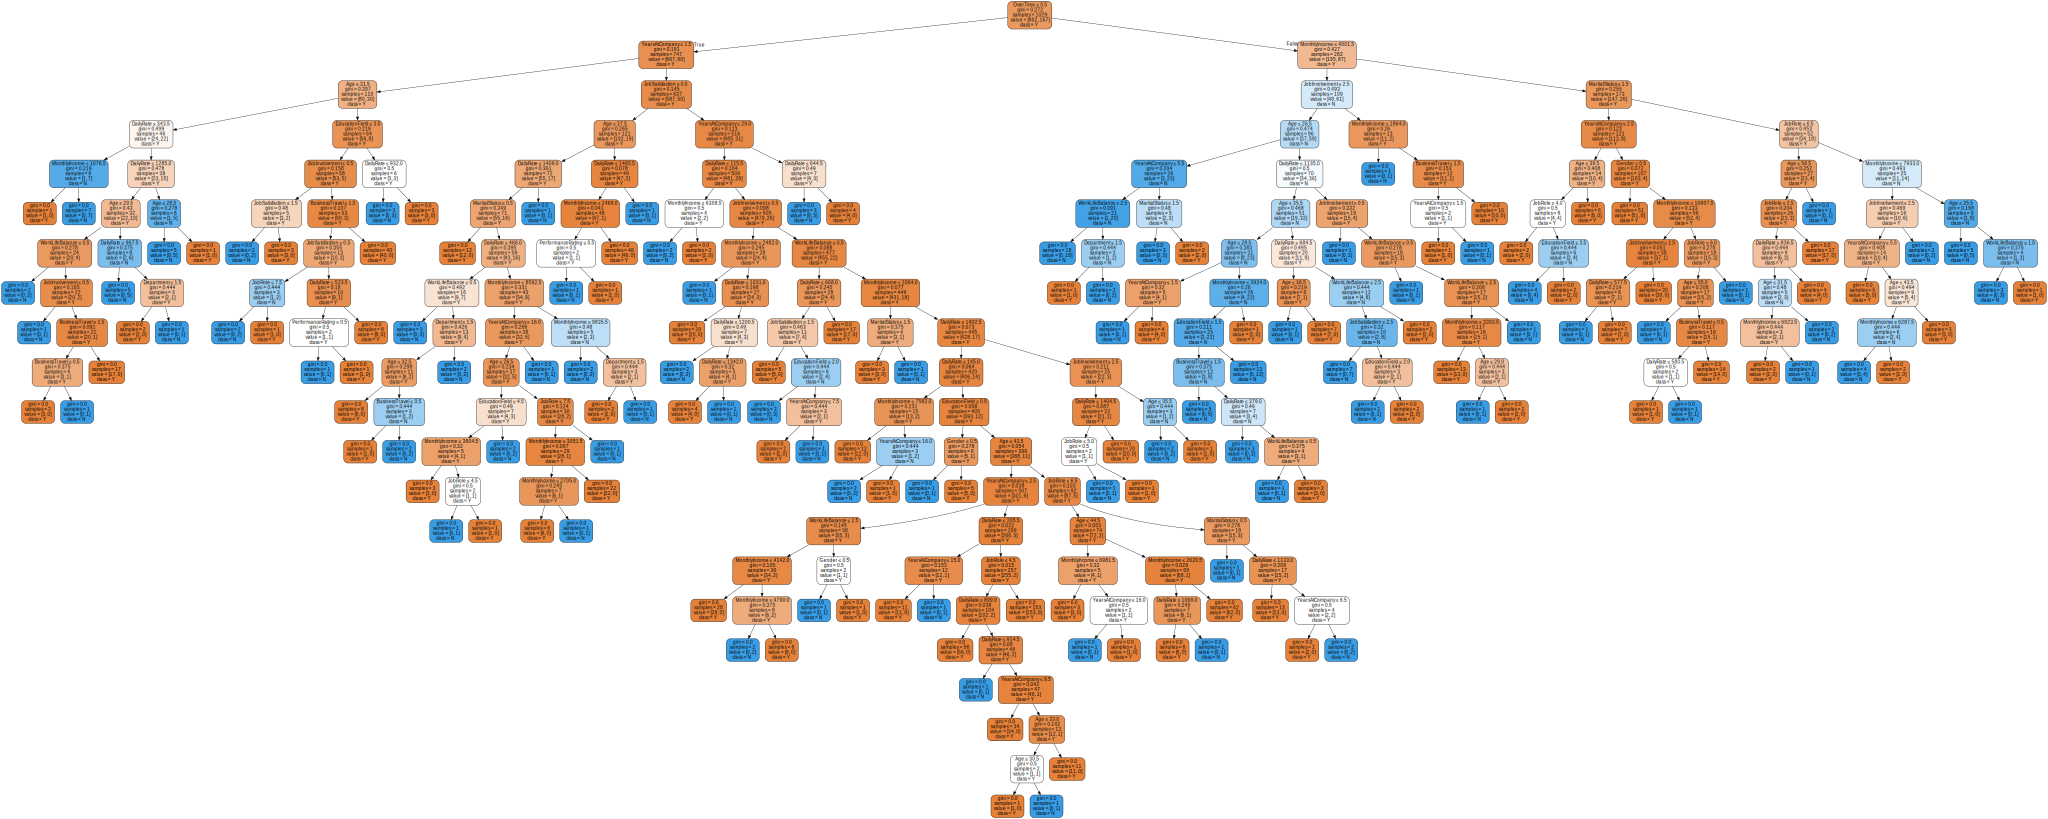

In [ ]:
graph = Source(export_graphviz(tree, out_file=None,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_name,class_names=['Y','N']))

display(SVG(graph.pipe(format='svg')))

4. Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 50)
rf.fit(x_train, y_train);
y_pred_RF = rf.predict(x_test)

#Evaluation

ทดสอบประสิทธิภาพของโมเดลแต่ละตัว

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

1. Naïve Bayes

In [ ]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       371
           1       0.57      0.36      0.44        70

    accuracy                           0.85       441
   macro avg       0.73      0.65      0.68       441
weighted avg       0.84      0.85      0.84       441



2. Logistic Regression

In [ ]:
print(classification_report(y_test,y_pred_LG))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       371
           1       0.75      0.21      0.33        70

    accuracy                           0.86       441
   macro avg       0.81      0.60      0.63       441
weighted avg       0.85      0.86      0.83       441



3. Decision Tree

In [ ]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       371
           1       0.33      0.37      0.35        70

    accuracy                           0.78       441
   macro avg       0.60      0.61      0.61       441
weighted avg       0.79      0.78      0.78       441



4. Random forest

In [ ]:
print(classification_report(y_test, y_pred_RF.round()))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       371
           1       0.53      0.24      0.33        70

    accuracy                           0.85       441
   macro avg       0.70      0.60      0.62       441
weighted avg       0.82      0.85      0.82       441



เมื่อเปรียบเทียบค่า Accuracy แต่ละโมเดลพบว่าค่า Accuracy ของ Logistic Regression มากที่สุด จึงเลือกใช้โมเดลนี้ในการทำนาย

#Deployment

Logistic Regression

และเมื่อนำชุดข้อมูลใหม่ทดลองในโมเดลได้ผลดังนี้

In [ ]:
s_test = pd.read_csv('sample.csv')

FileNotFoundError: ignored

In [ ]:
head_s = []
for column in s_test.columns:
    if s_test[column].dtype == object:
        head_s.append(column)
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for column in head_s:
    s_test[column] = label.fit_transform(s_test[column])

In [ ]:
s_test

In [ ]:
ans = lg.predict(s_test)
j = 1
for i in ans:
  if i==0:
    print("Employee ", j ,"Attrition  : No")
  else:
    print("Employee ", j ,"Attrition : Yes")
  j+=1

ผลที่ได้คือพนักงานคนที่ 1-19 ไม่มีแนวโน้มว่าจะลาออก
ส่วนพนักงานคนที่ 20 มีแนวโน้มที่จะลาออก 